In [2]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
# print(os.listdir("../input"))
import warnings
warnings.filterwarnings('ignore')

In [7]:
imdb_data=pd.read_csv('IMDB Dataset.csv') 
print(imdb_data.shape) 
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [8]:
#Summary of the dataset
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [9]:

#sentiment count
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [10]:
#split the dataset  
#train dataset
train_reviews=imdb_data.review[:40000]
train_sentiments=imdb_data.sentiment[:40000]
#test dataset
test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
#Нормализация текста
tokenizer=ToktokTokenizer()                          #Токенизация текста. Чтобы разделить выражение на слова
stopword_list=nltk.corpus.stopwords.words('english') #Установка английских стоп-слов

In [13]:
#Удаление html-полосок  Removing the html strips
def strip_html(text): 
    суп = BeautifulSoup(text, "html.parser") 
    return суп.get_text()
#Удаление квадратных скобок  Removing the square brackets
def remove_between_square_brackets(text): 
    return re.sub('\[[^]]*\]', '', text)
# Удаление зашумленного текста
def denoise_text(text): 
    text = strip_html(text) 
    text = remove_between_square_brackets(text) 
    return text 
#Применить функцию к столбцу просмотра
imdb_data['review']=imdb_data['review'].apply(denoise_text)

In [15]:
#Определить функцию для удаления специальных символов
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True): 
    pattern=r'[^a-zA-z0-9\s]' 
    text=re.sub(pattern,'',text) 
    return text 
# Применить функцию к столбцу обзора
# Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

Stemming — это метод исключения аффиксов из слов для получения базовой формы. Это то же самое, что обрезать ветки дерева до самого ствола. Основа терминов есть, ест и съедена, например, есть.

In [ ]:
#Вывод текста из текста
#Stemming the text
def simple_stemmer(text): 
    ps=nltk.porter.PorterStemmer() 
    text= ' '.join([ps.stem(word) for word in text.split()]) 
    return text 
#Применить функцию при просмотре столбец
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

Удаление стоп-слов и нормализация
Стоп-слова — это слова, которые мало или вообще не имеют значения, особенно при синтезе значимых аспектов текста.

Стоп-слова — это слова, которые отфильтровываются из данных естественного языка (текста) до или после их обработки на компьютере. В то время как «стоп-слова» обычно относятся к наиболее распространенным терминам языка, алгоритмы обработки полностью естественного языка не используют единый универсальный список.

К стоп-словам относятся такие слова, как a, an, the и другие.

In [16]:
# установить стоп-слова на английский язык
stop=set(stopwords.words('english')) 
print(stop) 

#удаление стоп-слов
def remove_stopwords(text, is_lower_case=False): 
    tokens = tokenizer.tokenize(text) 
    tokens = [token.strip () for token in tokens] 
    if is_lower_case: 
        filtered_tokens = [token for token in tokens if token not  in stopword_list] 
    else: 
        filtered_tokens = [token for token in tokens if token.lower() not  in stopword_list] 
    filtered_text = ' '.join (filtered_tokens)     
    return filtered_text
#Применить функцию к столбцу обзора
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

{'she', 'very', 'these', 'so', 'up', 'other', 'about', "won't", 'ain', 'most', 'o', 'couldn', 'theirs', "wouldn't", 'they', "you've", 'me', 'such', "you'll", 'both', 'itself', 'their', 'no', 'herself', 'is', 've', 'him', 'but', 'against', 'don', 'then', 'few', "wasn't", 'won', 'from', "it's", 'ourselves', 'just', 'are', 'between', 'when', 'yourself', "isn't", 'i', "didn't", 'it', 'where', 'until', 'off', "that'll", 'through', 'above', 'shouldn', 'he', 'each', 'weren', 'over', 'd', 'do', "haven't", 'whom', "aren't", 'who', 'nor', 'to', 'too', 'y', 'hasn', "you'd", 'mustn', 'of', 'the', 'doing', "she's", 'yourselves', 'mightn', 'further', "weren't", 'not', 'needn', 'more', 'those', 'were', 'does', "doesn't", 'aren', "mightn't", 'ma', 'themselves', 'its', 'should', 'own', 'her', "hasn't", 's', 'this', 'after', 'how', "shouldn't", 'here', 'into', 'be', 'what', 'why', 'under', 'we', 'during', 'all', 'hadn', 'a', 'any', 'which', 't', "you're", 'myself', 'for', 'your', 'out', 're', 'doesn', '

Нормализация текста — это процесс преобразования ранее неканонического текста в единую каноническую форму. Поскольку ввод гарантированно будет непротиворечивым до того, как над ним будут выполнены операции, нормализация текста перед его сохранением или обработкой позволяет разделить задачи.

Bag of Words (BoW) используется для преобразования текстовых файлов в числовые векторы или набор слов.

Модель Bag of Words (BoW) — это самый простой тип числового представления текста. Фраза может быть представлена ​​в виде набора векторов слов, как и сам термин (строка чисел).

In [17]:
#normalized train reviews
norm_train_reviews=imdb_data.review[:40000]
norm_train_reviews[0]

'One reviewers mentioned watching 1 Oz episode youll hooked right exactly happened meThe first thing struck Oz brutality unflinching scenes violence set right word GO Trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordIt called OZ nickname given Oswald Maximum Security State Penitentary focuses mainly Emerald City experimental section prison cells glass fronts face inwards privacy high agenda Em City home manyAryans Muslims gangstas Latinos Christians Italians Irish moreso scuffles death stares dodgy dealings shady agreements never far awayI would say main appeal show due fact goes shows wouldnt dare Forget pretty pictures painted mainstream audiences forget charm forget romanceOZ doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste Oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

In [20]:

#Normalized test reviews
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[45005]

'read reviews watching piece cinematic garbage took least 2 pages find somebody else didnt think appallingly unfunny montage WASNT acme humour 70s indeed era isnt least funny set sketch comedy Ive ever seen itll till comes along Half skits already done infinitely better acts Monty Python Woody Allen say nice piece animation lasts 90 seconds highlight film would still get close summing mindless drivelridden waste 75 minutes Seminal comedy world seminal really mean semen Scatological humour world scat actually feces Precursor jokes mean handbook comedy Tits bums odd beaver Niceif pubescent boy least one hand free havent found Playboy exists Give break early 70s way sketch comedy going back least ten years prior way could even forgive film even made gunpoint Retro Hardly Sketches clowns subtly perverting children may cutting edge circles could actually funny comes really quite sad kept going throughout entire 75 minutes Sheer belief may saved genuinely funny skit end gave film 1 lower sco

In [21]:
# Векторизатор счета для набора слов
# Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3)) 
# transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews) 
#transformed test reviews
cv_test_reviews=cv .transform(norm_test_reviews) 

print('BOW_cv_train:',cv_train_reviews.shape) 
print('BOW_cv_test:',cv_test_reviews.shape) 
#vocab=cv.get_feature_names() — чтобы получить имена функций

BOW_cv_train: (40000, 6675873)
BOW_cv_test: (10000, 6675873)


Термин частотно-обратная частотная модель документа (TFIDF)
Он используется для преобразования текстовых документов в матрицу функций tfidf.

Термин частотно-обратная статистика частоты документа является числовой мерой того, насколько важно слово для документа в коллекции.

In [22]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3)) 
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews) 
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews) 
print('Tfidf_train:',tv_train_reviews.shape) 
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6675873)
Tfidf_test: (10000, 6675873)


Векторизатор, используемый выше: встраивание слов, также известное как векторизация слов, представляет собой метод НЛП для сопоставления слов или фраз из лексикона с соответствующим вектором действительных чисел, который затем можно использовать для получения предсказаний слов и семантики. Векторизация — это процесс перевода слов в числа.

Маркировка текста тональности и разделение данных тональности

Label Binarizer — это класс SciKit Learn, который принимает категориальные данные и выводит массив Numpy. В отличие от Label Encoder, он кодирует данные в фиктивные переменные, которые указывают, присутствует ли конкретная метка или нет. Label Binarizer используется для кодирования данных столбца.

In [26]:
#маркировка разумных данных
lb=LabelBinarizer() 
#преобразованные данные о тональности
sentient_data=lb.fit_transform(imdb_data['sentiment']) 
print(sentient_data.shape)

(50000, 1)


In [27]:
# Разделение данных о настроениях
# Spliting the sentiment data
train_sentiments=sentient_data[:40000] 
test_sentiments=sentient_data[40000:] 
print(train_sentiments) 
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


Моделирование набора данных

Давайте построим мультиномиальную наивную байесовскую модель как для набора слов, так и для функций tfidf.

Алгоритм Multinomial Nave Bayes рассматривает вектор признаков, в котором каждый член отражает количество раз, когда он появляется или как часто он появляется, т.е. частота.

Обучение модели

Обучение модели как подходу, так и набору слов, и функциям tfidf.

In [28]:
#обучение модели
mnb=MultinomialNB() 
#подбор SVM для набора слов
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments) 
print(mnb_bow) 
#подбор SVM для функций tfidf
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments) 
print( mnb_tfidf)

MultinomialNB()
MultinomialNB()


Производительность модели на тестовых данных

Производительность модели путем прогнозирования модели как для подхода, так и для набора слов и функций tfidf.

In [29]:
# Прогнозирование модели для набора слов
mnb_bow_predict=mnb.predict(cv_test_reviews) 
print(mnb_bow_predict) 
# Прогнозирование модели для функций tfidf
mnb_tfidf_predict=mnb.predict(tv_test_reviews) 
print(mnb_tfidf_predict)

[0 0 0 ... 0 1 0]
[0 0 0 ... 0 1 0]


Точность модели

Точность как для подхода, так и для пакета слов и функций tfidf

In [30]:
#Оценка точности для набора слов
#Predicting the model for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict) 
print("mnb_bow_score :",mnb_bow_score) 
#Оценка точности для функций tfidf
#Predicting the model for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict) 
print("mnb_tfidf_score:",mnb_tfidf_score)
#Точность для BoW и TFIDF

mnb_bow_score : 0.744
mnb_tfidf_score: 0.7442


Визуализация отчета о классификации как для BoW, так и для TFIDF.

In [32]:
#Отчет о классификации набора слов
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative']) 
print(mnb_bow_report) 
#Отчет о классификации для функций tfidf
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.74      0.75      0.75      4993
    Negative       0.75      0.74      0.74      5007

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

              precision    recall  f1-score   support

    Positive       0.74      0.75      0.75      4993
    Negative       0.75      0.73      0.74      5007

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



Confusion matrix — это таблица, которая показывает, насколько хорошо модель классификации (или «классификатор») работает с набором тестовых данных, для которых известны истинные значения. Матрица путаницы сама по себе проста, но связанная с ней номенклатура может сбивать с толку.

In [33]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[3690 1317]
 [1243 3750]]
[[3680 1327]
 [1231 3762]]


Визуализация положительных и отрицательных слов с помощью WordCloud
Вы, наверное, видели облако, заполненное множеством слов разного размера, которые обозначают частоту или важность каждого слова. Это называется облаком тегов или WordCloud.

<function matplotlib.pyplot.show(close=None, block=None)>

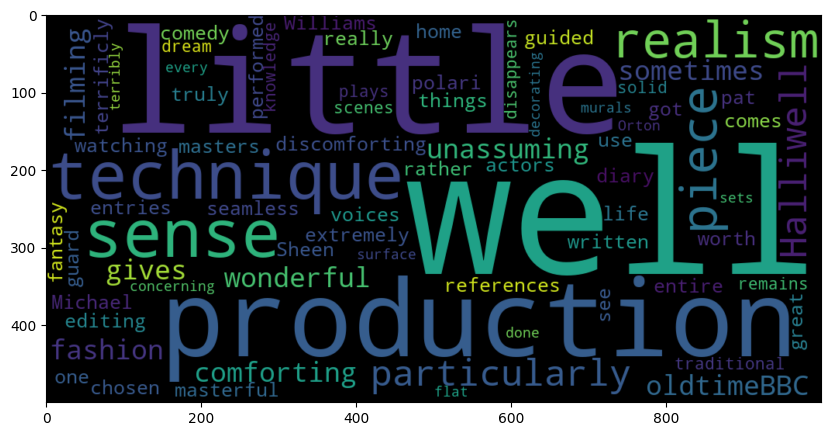

In [34]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

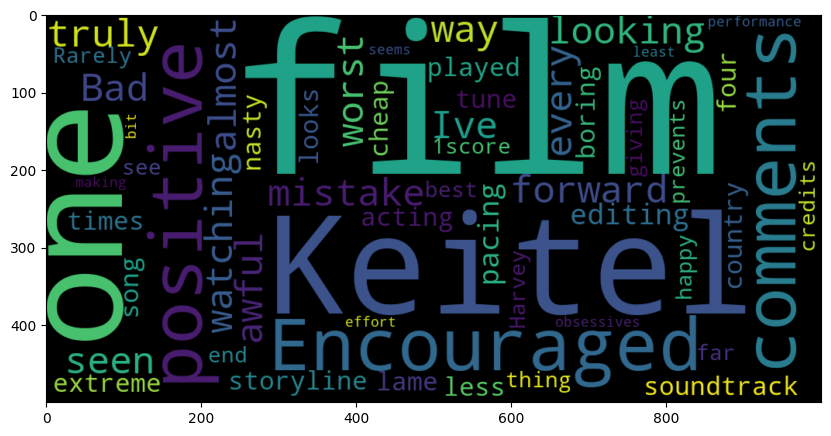

In [35]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show